In [67]:
import numpy as np
from sklearn.datasets import load_breast_cancer
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [68]:
data=load_breast_cancer()
# print(data)
X=data["data"]
Y=data["target"]

In [69]:
data1=pd.DataFrame(data["data"],columns=data["feature_names"])
data1["class"]=Y
data1.head()
# standardization=StandardScaler()
# X=standardization.fit_transform(X)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,class
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [70]:
X_train, X_test, y_train, y_test =train_test_split(X,Y,test_size=0.25,random_state=1)
print(X_train.mean())
print(X_test.mean())


62.265008168356815
60.77567721305361


In [111]:
class Perceptron:
    def __init__(self):
        self.w=None
        self.b=None
        
    def model(self,x):
        # return 1 if np.dot(self.w,x)>=self.b else 0
        if np.dot(self.w,x)>=self.b:
            return 1
        else:
            return 0

    def fit(self,X,Y,epoch=2,lr=1):
        '''
        X->Input features
        Y->Output labels
        epoch->number of times to run model to optimize w and b (hyperparameter)
        lr->learning rate (hyperparameter) 
        '''
        self.w=np.ones(X.shape[1])
        self.b=0
        max_accuracy=0
        accuracy=[]
        chkptb=0
        chkptw=[]
        for i in range(epoch):
            for x,y in zip(X,Y):
                y_pred=self.model(x)
                if y_pred==0 and y==1:
                    self.w=self.w+lr*x
                    self.b=self.b+lr*1
                elif y_pred==1 and y==0:
                    self.w=self.w-lr*x
                    self.b=self.b-lr*1
            accuracy.append(accuracy_score(Y,self.predict(X)))
            if(accuracy[i]>max_accuracy):
                max_accuracy=accuracy[i]
                chkptw=self.w
                chkptb=self.b
        self.w=chkptw
        self.b=chkptb
        plt.ylim([0,1])
        plt.plot(accuracy)
        plt.show()

    def predict(self,X):
        Y=[]
        for x in X:
            result=self.model(x)
            Y.append(result)
        return Y
    

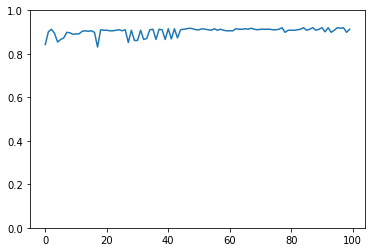

In [116]:
perceptron=Perceptron()
perceptron.fit(X_train,y_train,100,0.001)

In [117]:
print("w-\n",perceptron.w)
print("biase-\n",perceptron.b)

w-
 [ 5.221004    3.8263     23.39928     4.5718      1.02744778  0.91722454
  0.83202159  0.9343751   1.0358941   1.0253487   1.0397765   1.0955819
  0.6760559  -6.252514    1.00029365  0.97770944  0.96416809  0.99304076
  0.99627179  0.9993971   5.559554    3.53186    21.75415    -9.102
  1.02857019  0.70786062  0.54387174  0.8917683   1.0206374   1.00808048]
biase-
 0.5670000000000004


In [118]:
Y_pred=perceptron.predict(X_test)

In [119]:
print("Accuracy is ",accuracy_score(y_test,Y_pred))

Accuracy is  0.9300699300699301
